In [265]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax= MinMaxScaler()                                           # Create a MinMaxScaler object
scaler_standered=StandardScaler()                                       # Create a StandardScaler object


# Read CSV files

df=pd.read_csv("Training_Set_Values.csv")    # Read the CSV file
name_featrures=df.columns                    # Get the features name
len_features=len(name_featrures)                # Get the length of features
labels=pd.read_csv("Training_Set_Labels.csv") # Read the labels CSV file
labels.head()
df['traget'] = labels['status_group']        # Add the target column to the dataframe
#print(df.shape)                              # Print the shape of the dataframe
#df.head()
#df.info()


In [266]:
# Columns with Nan values
nan_columns = df.columns[df.isnull().any()].tolist()           # Get the columns with NaN values
print("Columns with NaN values: ", nan_columns)                # Print the columns names with NaN values
print("Number of columns with NaN values: ", len(nan_columns)) # Print the number of columns with NaN values
#df[nan_columns].head()                                         # Print the first 5 rows of the columns with NaN values

Columns with NaN values:  ['funder', 'installer', 'wpt_name', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']
Number of columns with NaN values:  8


In [267]:
# Exploration of NaN Columns
for col in nan_columns:                                             # Loop through the columns with NaN values
    print("--------------------------------------------------")     # Print a separator line
    print("Name:",col)                                              # Print the column name
    print("Number of NaN:",df[col].isnull().sum())                  # Print the number of NaN values in the column
    print("Percentage of NaN:", df[col].isnull().sum()/len(df)*100) # Print the percentage of NaN values in the column
    print(df[col].value_counts())                                   # Print the value counts of the column


--------------------------------------------------
Name: funder
Number of NaN: 3637
Percentage of NaN: 6.122895622895623
funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Kauzeni                      1
Juma                         1
Banca Reale                  1
Peter Mayiro                 1
Kahema                       1
Name: count, Length: 1896, dtype: int64
--------------------------------------------------
Name: installer
Number of NaN: 3655
Percentage of NaN: 6.153198653198653
installer
DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
Rilayo water project        1
Sent Tho                    1
UPM                         1
Magul                       1
Magoma ADP                  1
Name: count, Length: 2145, 

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64
median:  0.0


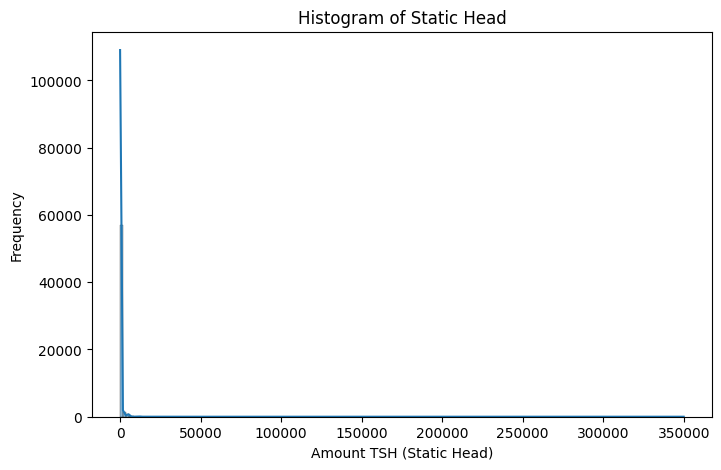

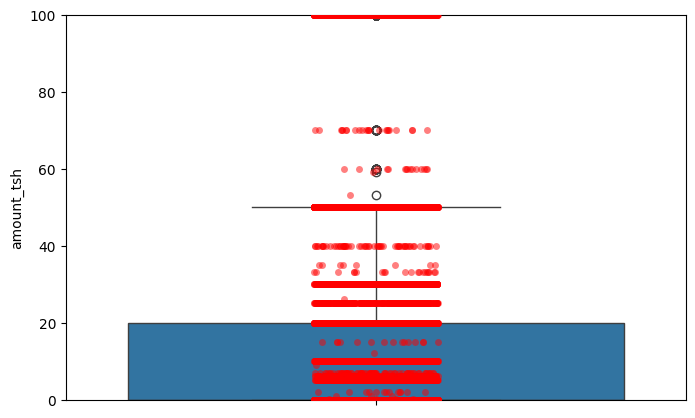

In [268]:
# Column 01 amount_tsh (Static Head)  ## 50 percent values are zero....I think Drop this column
print(df["amount_tsh"].describe())
print("median: ", df["amount_tsh"].median()) # Median is zero...means half of the points are zero (since points are positive)
plt.figure(figsize=(8,5))
sns.histplot(df["amount_tsh"], bins=200, kde=True)
plt.xlabel("Amount TSH (Static Head)")
plt.ylabel("Frequency")
plt.title("Histogram of Static Head")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(df["amount_tsh"])
sns.stripplot(df["amount_tsh"],color="red",alpha=0.5)
plt.ylim(0, 100) 
plt.show()




In [269]:

# Column 02 date_recorded (Date when the recoed entered)
print("date_recorded")

print("NaN value count:",df["date_recorded"].isnull().sum()) # Check if there are any null values in the column

df['date_year'] = pd.to_datetime(df['date_recorded']).dt.year# Convert to datetime format and extract year

df['date_year'].value_counts() # Print the value counts of the column


date_recorded
NaN value count: 0


date_year
2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: count, dtype: int64

--------------------------------
gps_height
NaN value count: 0
Percentage of NaN: 0.0
count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64
Median: 369.0


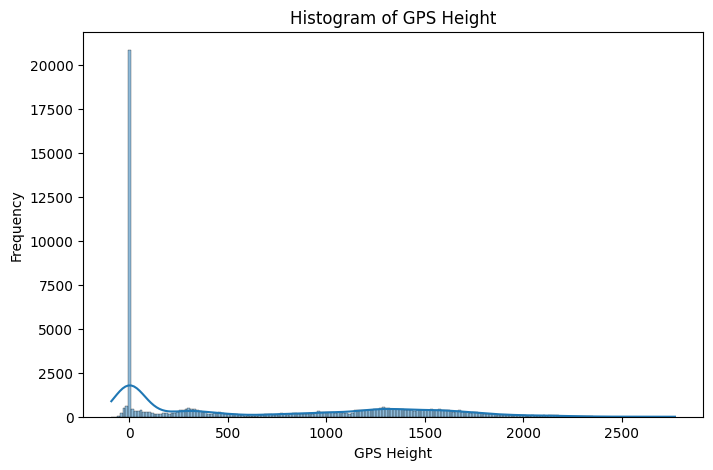

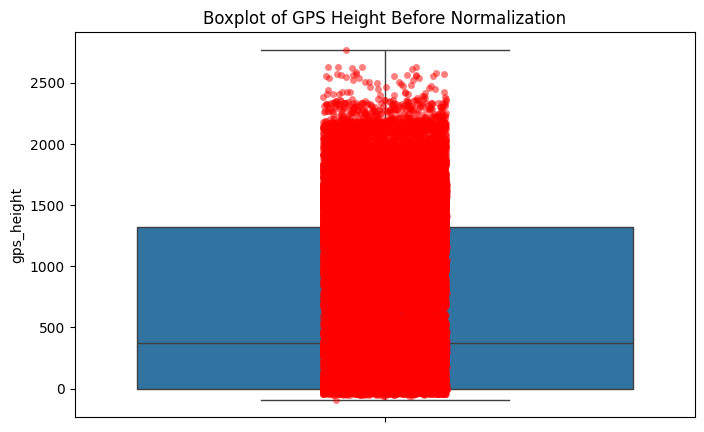

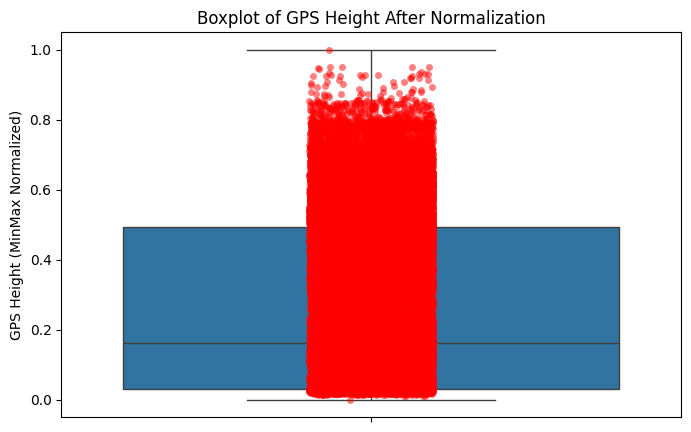

In [270]:
# Column gps_height (GPS Height) # The column needs to be considered as data is ok
print("--------------------------------")
print("gps_height")
print("NaN value count:",df["gps_height"].isnull().sum())                # Check if there are any null values in the column
print("Percentage of NaN:", df["gps_height"].isnull().sum()/len(df)*100) # Print the percentage of NaN values in the column
print(df["gps_height"].describe())                                       # Print the description of the column
print("Median:", df["gps_height"].median())                              # Print the median of the column
plt.figure(figsize=(8,5))
sns.histplot(df["gps_height"], bins=200, kde=True)                       # Plot the histogram of the column
plt.xlabel("GPS Height")
plt.ylabel("Frequency")
plt.title("Histogram of GPS Height")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(y=df["gps_height"])
sns.stripplot(y=df["gps_height"], color="red", alpha=0.5)                # Adds all points
plt.title("Boxplot of GPS Height Before Normalization")
plt.show() # Show the plot



df["gps_height_minmax_normalized"]=scaler_minmax.fit_transform(df["gps_height"].values.reshape(-1,1)) # Fit and transform the data using MinMaxScaler
plt.figure(figsize=(8,5))
sns.boxplot(df["gps_height_minmax_normalized"])
sns.stripplot(df["gps_height_minmax_normalized"], color="red", alpha=0.5)  # Adds all points
plt.ylabel("GPS Height (MinMax Normalized)")
plt.title("Boxplot of GPS Height After Normalization")
plt.show() # Show the plot



In [271]:
print(df["gps_height"].head(2))
print(df["gps_height"].head(2).values)

0    1390
1    1399
Name: gps_height, dtype: int64
[1390 1399]


--------------------------------
longitude
NaN value count: 0
count    59400.000000
mean        34.077427
std          6.567432
min          0.000000
25%         33.090347
50%         34.908743
75%         37.178387
max         40.345193
Name: longitude, dtype: float64
Median: 34.90874343


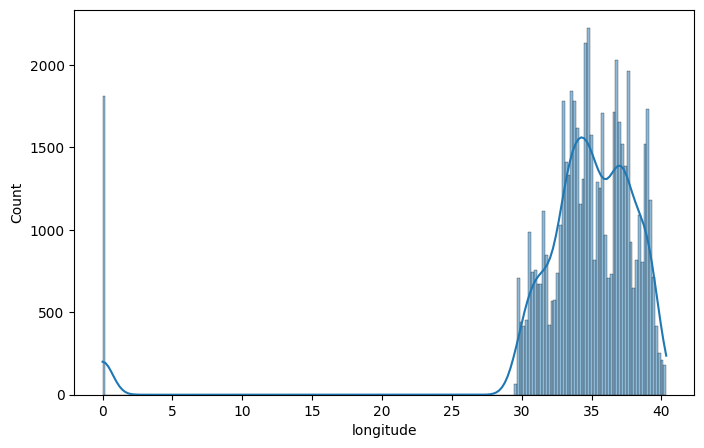

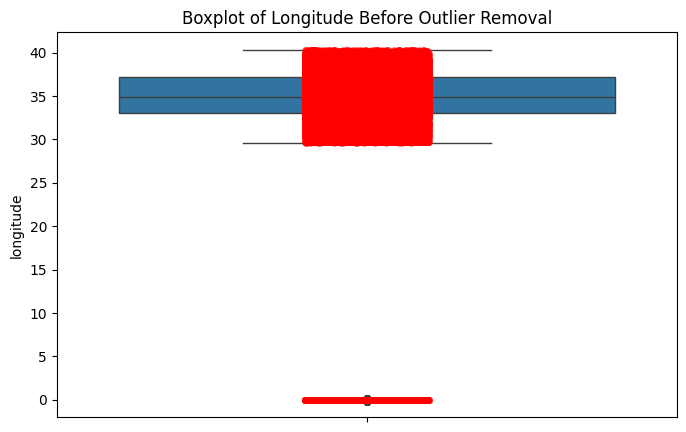

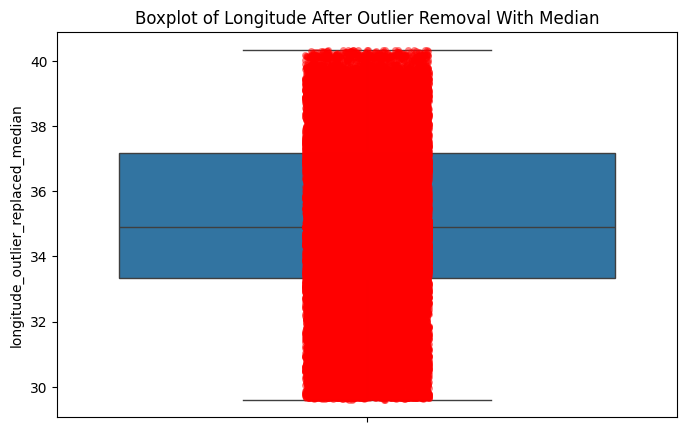

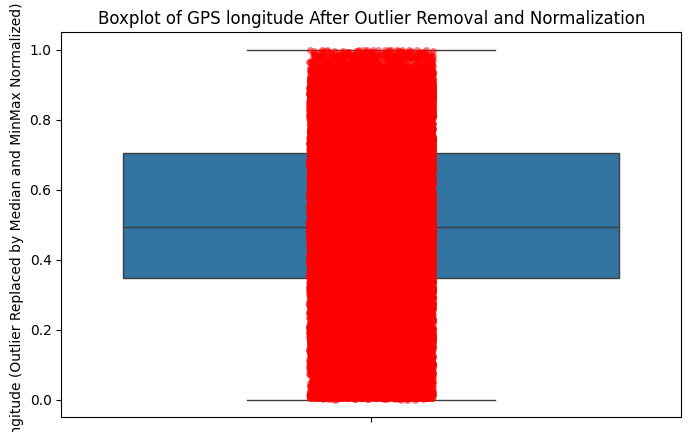

In [272]:
#Columns longitude (GPS Coordinates) # The column needs to be considered as data is ok
print("--------------------------------")
print("longitude")
print("NaN value count:",df["longitude"].isnull().sum())                # Check if there are any null values in the column
print(df["longitude"].describe())                                                  # Print the description of the column
print("Median:", df["longitude"].median())                              # Print the median of the column

plt.figure(figsize=(8,5))
sns.histplot(df["longitude"], bins=200, kde=True)               # Plot the histogram of the column
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(df["longitude"])
sns.stripplot(df["longitude"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of Longitude Before Outlier Removal")
plt.show() # Show the plot

# Remove the outliers from the longitude column
Q1=df["longitude"].quantile(0.25) # 25th percentile
Q3=df["longitude"].quantile(0.75) # 75th percentile
IQR=Q3-Q1 # Interquartile range
Lower_bound_longitude=Q1-1.5*IQR # Lower bound
Upper_bound_longitude=Q3+1.5*IQR # Upper bound

df["longitude_outlier_replaced_median"]=df["longitude"].apply(lambda x:x if ((x>=Lower_bound_longitude) &(x<=Upper_bound_longitude)) else df["longitude"].median()) # Replace outliers with median value


plt.figure(figsize=(8,5))
sns.boxplot(df["longitude_outlier_replaced_median"])
sns.stripplot(df["longitude_outlier_replaced_median"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of Longitude After Outlier Removal With Median")
plt.show() # Show the plot


df["longitude_outlier_replaced_median_minmax_normalized"]=scaler_minmax.fit_transform(df["longitude_outlier_replaced_median"].values.reshape(-1,1)) # Fit and transform the data using MinMaxScaler
plt.figure(figsize=(8,5))
sns.boxplot(df["longitude_outlier_replaced_median_minmax_normalized"])
sns.stripplot(df["longitude_outlier_replaced_median_minmax_normalized"], color="red", alpha=0.5)  # Adds all points
plt.ylabel("longitude (Outlier Replaced by Median and MinMax Normalized)")
plt.title("Boxplot of GPS longitude After Outlier Removal and Normalization")
plt.show() # Show the plot



--------------------------------
latitude
NaN value count: 0
count    5.940000e+04
mean    -5.706033e+00
std      2.946019e+00
min     -1.164944e+01
25%     -8.540621e+00
50%     -5.021597e+00
75%     -3.326156e+00
max     -2.000000e-08
Name: latitude, dtype: float64
Median: -5.021596649999999


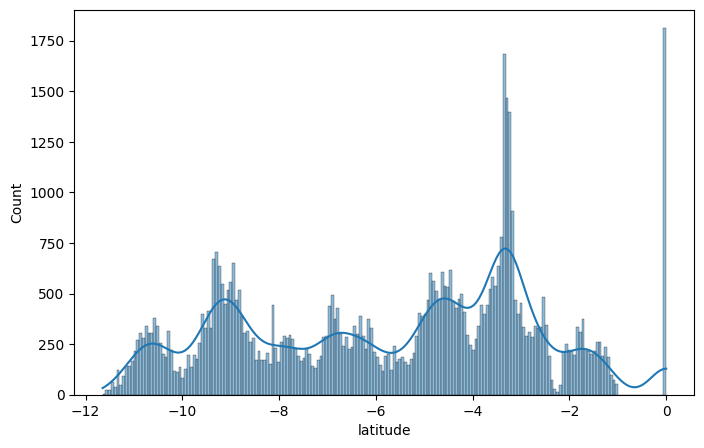

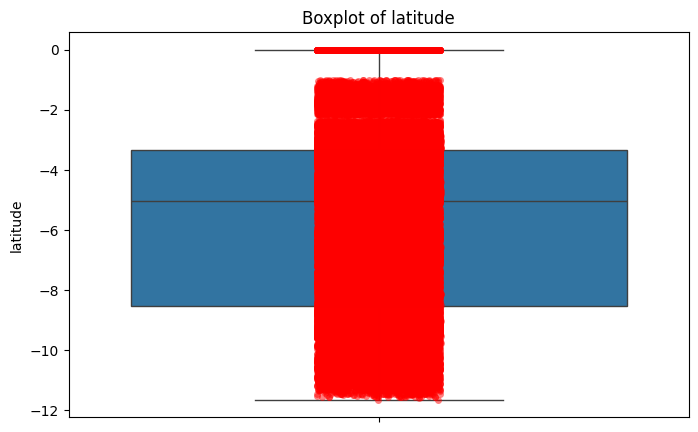

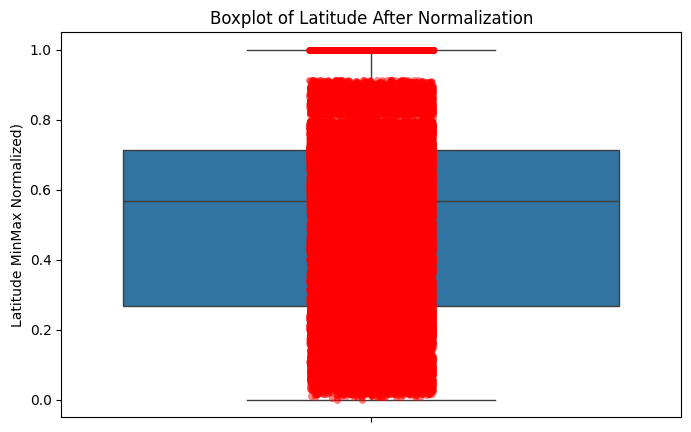

In [273]:
#Columns latitude (GPS Coordinates) # The column needs to be considered as data is ok
print("--------------------------------")
print("latitude")
print("NaN value count:",df["latitude"].isnull().sum())                # Check if there are any null values in the column
print(df["latitude"].describe())                                                  # Print the description of the column
print("Median:", df["latitude"].median())                              # Print the median of the column

plt.figure(figsize=(8,5))
sns.histplot(df["latitude"], bins=200, kde=True)               # Plot the histogram of the column
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(df["latitude"])
sns.stripplot(df["latitude"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of latitude")
plt.show() # Show the plot


df["latitude_minmax_normalized"]=scaler_minmax.fit_transform(df["latitude"].values.reshape(-1,1)) # Fit and transform the data using MinMaxScaler
plt.figure(figsize=(8,5))
sns.boxplot(df["latitude_minmax_normalized"])
sns.stripplot(df["latitude_minmax_normalized"], color="red", alpha=0.5)  # Adds all points
plt.ylabel("Latitude MinMax Normalized)")
plt.title("Boxplot of Latitude After Normalization")
plt.show() # Show the plot


--------------------------------
count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64


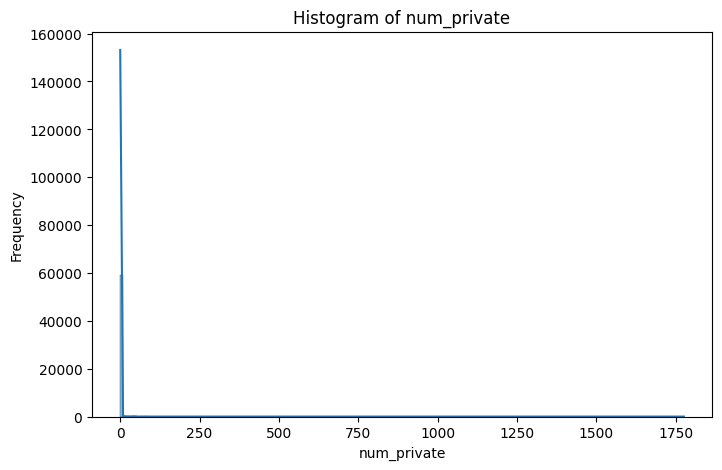

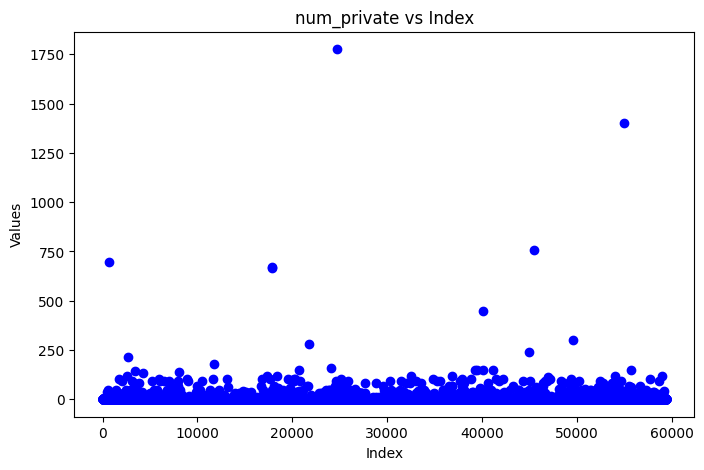

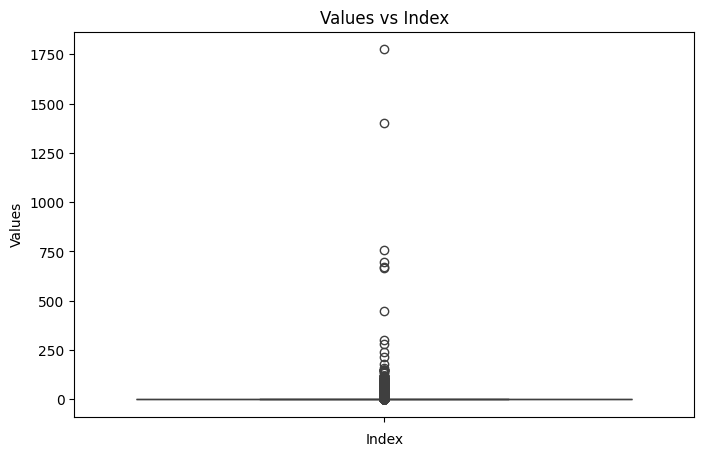

In [274]:
# Column num_private # Since 50% values are zero better to drop this column
print("--------------------------------")
print(df["num_private"].describe()) # Print the description of the column
df["num_private"].isnull().sum() # Check if there are any null values in the column
plt.figure(figsize=(8,5))
sns.histplot(df["num_private"], bins=200,kde=True) # Plot the histogram of the column
plt.title("Histogram of num_private")
plt.xlabel("num_private")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8,5))
plt.scatter(df.index, df['num_private'], color='blue', label='Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title("num_private vs Index")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(df["num_private"])
#sns.stripplot(df["num_private"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of num_private")
# Labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values vs Index')
plt.show()

In [ ]:
# Column basin # The column needs to be considered as data is ok..I used One Hot Encoding for this
print("NaN value count:",df["basin"].isnull().sum())                # Check if there are any null values in the column
df["basin"].describe() # Print the value counts of the column
df.basin.value_counts() # Print the value counts of the column
df = pd.get_dummies(df, columns=["basin"], prefix="basin") # Convert categorical variable into dummy/indicator variables
df.drop(columns=["basin_Internal"], inplace=True) # Drop the first column to avoid dummy variable trap

NaN value count: 0


In [277]:
df.shape
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'traget',
       'date_year', 'gps_height_minmax_normalized',
       'longitude_outlier_replaced_median',
       'longitude_outlier_replaced_median_minmax_normalized',
       'latitude_minmax_normalized', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_